# План работы:

**[1. Выгрузка и загрузка данных и их визуальный просмотр](#stage_1)**


    1. Сбор информации для формирования списка устройств и веделения технических характеристик для дальнейшего анализа.
    2. Написание кода sql для создания собственного датасета и определение типов данных для каждой технической характеристики.
    3. Распределение технических характеристик на категориальные и количественные.
    

**[2. Предобработка данных](#stage_2)**

    1. Найти пропуски данных и выявить причины возникновения.
    2. Заменить пропуски в данных, которые препятствуют дальнейшему анализу.
    
**[3. Исследовательский анализ данных](#stage_3)**

    1. Построение графиков по разным техническим параметрам для визуализации данных.
    2. Анализ негативных отзывов пользователей, по устройствам с общим рейтингом ниже 4.5 с помощью лемматизации. Формулирование основных проблем использования устройств 'видеоняня' у потребителей.
    
**[4. Специальное задание (Выбрать для заказчика устройство с главным критерием 'миниатюрность')](#stage_4)**

    1. Определить 'миниатюрное' устройство с подключением к телефону по техническим характеристикам: child_size_width/child_size_length.
        Так как у пользователя есть функция подключения к телефону, то целесообразно будет искать лучшее устройство только по размерам камер. 
    2. Определить 'миниатюрное' устройство без подключения к телефону по техническим характеристикам: parent_size_width/parent_size_length.
        Так как у пользователя отсутствует функция подключения к телефону, то целесообразно будет искать лучшее устройство только по размеру родительского дисплея.
    3. Сделаем такой же анализ по камерам.
        
**[5. Проверка гипотез](#stage_5)**

    1. гипотеза:
    средняя цена за устройство без подключения к телефону не отличается от устройства с подключением к телефону
    2. гипотеза: 
    средний размер видеонянь с подключением к телефону не отличается от видеокамер.

**[6. Общий вывод](#stage_6)**



#####  <a name="contents">оглавление</a>

# Цели и задачи проекта
### 1.Исследовать рынок устройств с функционалом 'видеоняня':

* Сформировать список устройств на рынке
* Выделить технические характеристики
* Сформулировать основные проблемы использования устройств 'видеоняня' у потребителей

### 2.Выбрать для заказчика устройство с главным критерием 'миниатюрность'
1. Миниатюрность по камерам, то есть child_size_width/child_size_length
2. Миниатюрность по дисплеям, если они есть, то есть parent_size_width/parent_size_length
3. Миниатюрность по видеокамерам

<a name="stage_1"></a>
# Описание данных
 [обратно в оглавление](#contents)
* name - название
* price - цена
* user_rating - оценка
* region - страна производства
* range_inside - Радиус действия внутри помещений
* range_outside - Радиус действия на открытом пространстве
* phone_connection - Тип подключения (0 - смартфон или 1)
* resolution - разрешение
* count_connection_type - Количество каналов связи
* connection_type - Тип связи
* display - Диагональ монитора (в дюймах)
* battery_life - Время автономной работы ( в часах)
* child_size_width - Ширина детского блока
* child_size_length	- Высота детского блока
* parent_size_width - Ширина родительского блока
* parent_size_length - Высота родительского блока
* weight - Вес (гр)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('baby_monitors.csv')
data.head(40)
data.query('index == 3')
data = data.drop(data.index[3])
#df = df.drop(df.index[n])
data.query('index == 25')
data['parent_size_width'].index[25]
data.query('index == 25')
data.loc[(data.parent_size_width ==36.0), 'parent_size_width'] = 100
data.loc[(data.parent_size_length ==40.0), 'parent_size_length'] = 160
data.loc[(data.child_size_length ==69.0), 'child_size_length'] = 80
data.loc[(data.child_size_width ==50.0), 'child_size_width'] = 80
#df.loc[(df.a < 0), 'a'] = 0
#data
#data[['name','price', 'phone_connection']]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 38
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   38 non-null     object 
 1   price                  38 non-null     int64  
 2   user_rating            38 non-null     float64
 3   region                 38 non-null     object 
 4   range_inside           31 non-null     float64
 5   range_outside          35 non-null     float64
 6   phone_connection       38 non-null     int64  
 7   resolution             31 non-null     object 
 8   count_connection_type  27 non-null     float64
 9   connection_type        37 non-null     object 
 10  display                30 non-null     float64
 11  battery_life           25 non-null     float64
 12  child_size_width       35 non-null     float64
 13  child_size_length      35 non-null     float64
 14  parent_size_width      26 non-null     float64
 15  parent_s

<font size="4">Наши данные состоят из *39 строк(моделей видеонянь) и 17 столбцов(технических характеристик)*</font>

<AxesSubplot:>

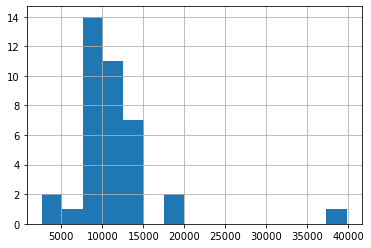

In [4]:
data['price'].hist(bins = 15)

<font size="4">Дело в том что, распределение больших данных работает по закону нормального распределения. В нашем случае мы имеем очень мало данных, но анализируем их методами для анализа больших данных. В таком случае, чтобы наш анализ имел смысл, мы должны собрать такую выборку данных, которая будет похожа на *нормальное распределение*. Таким образом, мы делаем нашу выборку *репрезентативной* и уже её можно анализировать методами анализа больших данных. Для этого мы выбирали *видеоняни в диапазоне от 8000 до 15000*, а также выбрали пару очень дешевых и дорогих видеонянь, чтобы в нашей выборке были выбросы как в настоящих данных</font>

# Предобработка данных<a name="stage_2"></a>
 [обратно в оглавление](#contents)

In [5]:
data.isnull().sum(axis=0).sort_values()

name                      0
price                     0
user_rating               0
region                    0
phone_connection          0
connection_type           1
weight                    2
child_size_width          3
child_size_length         3
range_outside             3
resolution                7
range_inside              7
display                   8
count_connection_type    11
parent_size_length       12
parent_size_width        12
battery_life             13
dtype: int64

In [6]:
data.shape[0]

38

In [7]:
connection_type = ((data['connection_type'].isnull().sum() / data.shape[0])).round(2)
#print('{:.0%}'.format(connection_type))

weight = ((data['weight'].isnull().sum() / data.shape[0])).round(2)
#print('{:.0%}'.format(weight))

range_outside = ((data['range_outside'].isnull().sum() / data.shape[0])).round(2)
#print('{:.0%}'.format(range_outside))

range_inside = ((data['range_inside'].isnull().sum() / data.shape[0])).round(2)
#print('{:.0%}'.format(range_inside))

child_size_width = ((data['child_size_width'].isnull().sum() / data.shape[0])).round(2)
#print('{:.0%}'.format(child_size_width))

child_size_length = ((data['child_size_length'].isnull().sum() / data.shape[0])).round(2)
#print('{:.0%}'.format(child_size_length))

display = ((data['display'].isnull().sum() / data.shape[0])).round(2)
#print('{:.0%}'.format(display))

parent_size_length = ((data['parent_size_length'].isnull().sum() / data.shape[0])).round(2)
#print('{:.0%}'.format(parent_size_length))

count_connection_type = ((data['count_connection_type'].isnull().sum() / data.shape[0])).round(2)
#print('{:.0%}'.format(count_connection_type))

parent_size_width = ((data['parent_size_width'].isnull().sum() / data.shape[0])).round(2)
#print('{:.0%}'.format(parent_size_width))

battery_life = ((data['battery_life'].isnull().sum() / data.shape[0])).round(2)
#print('{:.0%}'.format(battery_life))

In [8]:
data_insull= {'connection_type': [connection_type], 'weight': [weight], 'range_outside':[range_outside], 'range_inside':[range_inside], 'child_size_width':[child_size_width], 'child_size_length':[child_size_length], 'display':[display], 'parent_size_length':[parent_size_length], 'count_connection_type':[count_connection_type], 'parent_size_width':[parent_size_width], 'battery_life':[battery_life]}
df = pd.DataFrame(data_insull)
#df['connection_type'] = df['connection_type'].astype(%)
df.index = ['NaN/cells_%']


df
x = df.T
x = x.assign(last=pd.to_numeric(x.last, errors='coerce'))
NaN_gap = x.drop(['last'], axis = 1)
NaN_gap['NaN/cells_%'] = NaN_gap['NaN/cells_%'].astype(object)
#x.rename(columns = {'weigth':'1'}, inplace = True)
NaN_gap['NaN/cells_%']=NaN_gap['NaN/cells_%']*100


In [9]:
NaN_gap.sort_values(by = 'NaN/cells_%')

,NaN/cells_%
connection_type,3
weight,5
range_outside,8
child_size_width,8
child_size_length,8
range_inside,18
display,21
count_connection_type,29
parent_size_length,32
parent_size_width,32


<font size="4">Мы можем видеть, что наши столбцы с техническими характеристиками имеют очень много пропусков. Наши данные собирались вручную, поэтому было очень проблематично найти все технические характеристики каждой видеокамеры. В дальнейшем мы будем обрабатывать эти пропуски</font>

In [10]:
##def convert_percent(val):
##    new_val = val.replace('%', '')
##    return float(new_val) / 100
##x['NaN_percent'].apply(convert_percent)
#
#x['NaN_percent'].apply(lambda x: x.replace('%', ''))

## Анализируем столбец с технической характеристикой - resolution

In [11]:
data['resolution'].unique()

array(['320х200', nan, '360х240', '1280x720', '1920х1080', '640х480',
       '640x480', '320х240', '480x272', '480х272', '320x240', '1920x1080',
       '1280x1024', '220x176'], dtype=object)

In [12]:
data[['name', 'price', 'resolution']][data['resolution'].isnull()]

,name,price,resolution
1,Hello Baby HB32,8900,NaN
2,Beurer JBY100,8800,NaN
8,Summer Infant Slim&Secure 2.5,9799,NaN
13,Hello Baby HB65,11399,NaN
15,Ramili Baby RV500X2,12500,NaN
32,Philips AVENT SCD60300,10899,NaN
33,Miniland Digimonitor 3.5 plus,19500,NaN


In [13]:
data['resolution'] = data['resolution'].fillna('tbd')
#data['resolution']

In [14]:
def resolution(table):
    if '1920x1080' in table:
        return 9
    if '1920х1080' in table:
        return 9
    if '1280x720' in table:
        return 7
    if '1280x720' in table:
        return 7
    if '640х480' in table:
        return 6
    if '640x480' in table:
        return 6
    if '480х272' in table:
        return 5
    if '480x272' in table:
        return 5
    if '320x240' in table:
        return 4
    if '320х240' in table:
        return 4
    if '320х200' in table:
        return 3
    if '320х200' in table:
        return 3
    if '220x176' in table:
        return 2
    if '220x176' in table:
        return 2
    if 'tbd' in table:
        return 1
    if '1280x1024' in table:
        return 8

data['resolution_count'] = data['resolution'].apply(resolution)
#data['resolution_count']

<font size="4">Вывод: пропуски в столбце **'resolution'** просто меняем на **'tbd'**. В дальнейшем нам надо будет отсортировать камеры по разрешению. Проблема в том, что стобец **'resolution'** имеет тип **object**. Создадим столбец **'resolution_count'** в котором придумаем рейтинговую систему для разрешения камер, т.e **'220x176' - 1**, **'1920x1080' - 9**. Тем самым в дальнейшем мы отсортируем столбец по возрастанию и определим какие камеры имеют самое лучшее разрешение.</font>

## Анализируем столбец с технической характеристикой - battery_life

In [15]:
data['battery_life'] = data['battery_life'].astype('Int64')
data['battery_life'].unique()

<IntegerArray>
[6, 5, 8, 3, <NA>, 40, 18, 10, 13, 50, 4, 24]
Length: 12, dtype: Int64

In [16]:
data['battery_life'] = data['battery_life'].fillna(-1)

In [17]:
# Список устройств без аккумулятора
data[data['battery_life'] == -1]['name']

5              Miniland everywhere IPcam
6                         HelloBaby HB25
8          Summer Infant Slim&Secure 2.5
9                Miniland Spin IP Camera
11               Motorola MBP853 CONNECT
14                        Alecto DVM-150
16                  Chicco Top Delux 254
23    Wi-Fi Wisenet SmartCam SNH-V6410PN
26                  Chicco Basic - Smart
27                      iBaby Monitor M6
28          Samsung SmartCam SNH-C6417BN
32                Philips AVENT SCD60300
37                          SITITEK BM02
Name: name, dtype: object

<font size="4">Мы получили пропуски в данных, описывающих время
работы устройств, так как, скорее всего, эти устройства работают **на батарейках или от сети.** Какая-то малая часть магазинов указывает вместо времени работы батареи ёмкость аккумуляторов</font>

## Анализируем столбец с технической характеристикой - count_connection_type

In [18]:
data[['price', 'child_size_width', 'child_size_length', 'count_connection_type']][data['count_connection_type'].isnull()]

,price,child_size_width,child_size_length,count_connection_type
1,8900,64.0,125.0,NaN
2,8800,89.0,110.0,NaN
16,12769,95.0,125.0,NaN
18,13990,123.0,77.0,NaN
19,13990,105.0,170.0,NaN
21,9900,24.0,95.0,NaN
23,9990,84.0,85.0,NaN
24,10000,130.0,140.0,NaN
25,10700,80.0,80.0,NaN
36,3620,60.0,60.0,NaN


<font size="4">Скорее всего, магазин просто не посчитал нужным указывать эту информацию. Пропуски заменять не будем, потому что в дальнейшим **использовать эти данные в анализе не будем.**</font>

## Анализируем столбец с технической характеристикой - child_size_width / length

In [19]:
data[['name', 'price', 'child_size_width', 'child_size_length', 'parent_size_length',  'phone_connection']][data['child_size_width'].isnull()]

,name,price,child_size_width,child_size_length,parent_size_length,phone_connection
4,Kodak CHERISH C220,9148,NaN,NaN,NaN,1
30,Kodak CHERISH C225,8090,NaN,NaN,NaN,0
32,Philips AVENT SCD60300,10899,NaN,NaN,150.0,1


In [20]:
data = data.dropna(subset = ['child_size_width'])

<font size="4">К сожалению, **удаляем устройства, где не указаны размеры камер.** Эти данные не несут ценности для нашего анализа.</font>

## Анализируем столбец с технической характеристикой - parent_size_width / length

In [21]:
data[['name','price', 'child_size_width', 'child_size_length', 'parent_size_width', 'parent_size_length', 'phone_connection']][data['parent_size_width'].isnull()]

,name,price,child_size_width,child_size_length,parent_size_width,parent_size_length,phone_connection
5,Miniland everywhere IPcam,9380,85.0,111.0,NaN,NaN,0
9,Miniland Spin IP Camera,12880,105.0,125.0,NaN,NaN,0
12,Ramili Baby RV1300,14990,100.0,150.0,NaN,NaN,0
20,Alcatel IPC-21FX,14650,56.0,130.0,NaN,NaN,0
23,Wi-Fi Wisenet SmartCam SNH-V6410PN,9990,84.0,85.0,NaN,NaN,0
24,Link-NC21G-8GS,10000,130.0,140.0,NaN,NaN,0
26,Chicco Basic - Smart,11500,180.0,220.0,NaN,NaN,1
27,iBaby Monitor M6,9990,117.0,151.0,NaN,NaN,0
28,Samsung SmartCam SNH-C6417BN,10390,100.0,120.0,NaN,NaN,0
29,iBaby Monitor M2,10490,76.0,76.0,NaN,NaN,0


In [22]:
data['parent_size_width'] = data['parent_size_width'].fillna(-1)
data['parent_size_length'] = data['parent_size_length'].fillna(-1)

<font size="4">У подавляющего большинства устройств, где отсутсвует размер пульта присутствует подключение через телефон. Это даёт нам смело заявлять, что пульт в комплекте не предусматривается. Просто **заполняем пропуски -1.**</font>

## Анализируем столбец с технической характеристикой - range_outside


In [23]:
data[['price', 'range_inside', 'range_outside', 'connection_type']][data['range_outside'].isnull()]

,price,range_inside,range_outside,connection_type
20,14650,NaN,NaN,Wi-Fi
27,9990,NaN,NaN,Wi-Fi
28,10390,NaN,NaN,Wi-Fi


In [24]:
data['range_outside'] = data['range_outside'].fillna(-1)

<font size="4">__Пропуски в ***'range_outside'*** также заменим -1.__ Конечно было бы гораздо лучше использовать медиану столбца **'range_outside'**, где присутствуют схожие значения в столбце **'range_inside'**. Но из-за отсутствия больших данных мы не можем этого сделать.</font>

## Анализируем столбец с технической характеристикой - range_inside


In [25]:
data[['range_inside', 'range_outside', 'price']][data['range_inside'].isnull()]

,range_inside,range_outside,price
2,NaN,150.0,8800
11,NaN,300.0,11220
19,NaN,300.0,13990
20,NaN,-1.0,14650
27,NaN,-1.0,9990
28,NaN,-1.0,10390


In [26]:
data['range_inside'] = data['range_inside'].fillna(-1)

<font size="4">__Пропуски в ***'range_inside'*** также заменим -1.__ Конечно было бы гораздо лучше использовать медиану столбца **'range_inside'**, где присутствуют схожие значения в столбце **'range_outside'**. Но из-за отсутствия больших данных мы не можем этого сделать.</font>

In [27]:
#data[['phone_connection', 'range_inside', 'range_outside', 'price']].query('price >= 8000').sort_values(by = ['price'])

## Анализируем столбец с технической характеристикой - weight


In [28]:
data[['price', 'parent_size_width', 'parent_size_length', 'weight']][data['weight'].isnull()]

,price,parent_size_width,parent_size_length,weight
19,13990,85.0,110.0,NaN
21,9900,75.0,111.0,NaN


In [29]:
data[['price', 'parent_size_length', 'parent_size_width', 'weight']].sample(5)

,price,parent_size_length,parent_size_width,weight
29,10490,-1.0,-1.0,150.0
31,10990,110.0,50.0,650.0
2,8800,140.0,65.0,154.0
8,9799,64.0,108.0,1000.0
7,9600,70.0,170.0,750.0


In [30]:
data['weight'].fillna(value = data.groupby(['parent_size_length', 'parent_size_width'])['weight'].transform('median'), inplace = True)

In [31]:
data['weight'].fillna(value = data.groupby(['parent_size_length',])['weight'].transform('median'), inplace = True)

<font size="4">**Мы нашли устройства похожие по размеру и, предположили, что вес будет схож, таким образом, заменили пропуски на вес этих устройств**. Было бы гораздо лучше учитывать приблизительную цену устройств, схожих по размеру. Потому что вес устройства также зависит от материалов. Как правило, чем дороже материал, тем легче устройство.</font>

# Исследовательский анализ данных <a name="stage_3"></a>

 [обратно в оглавление](#contents)

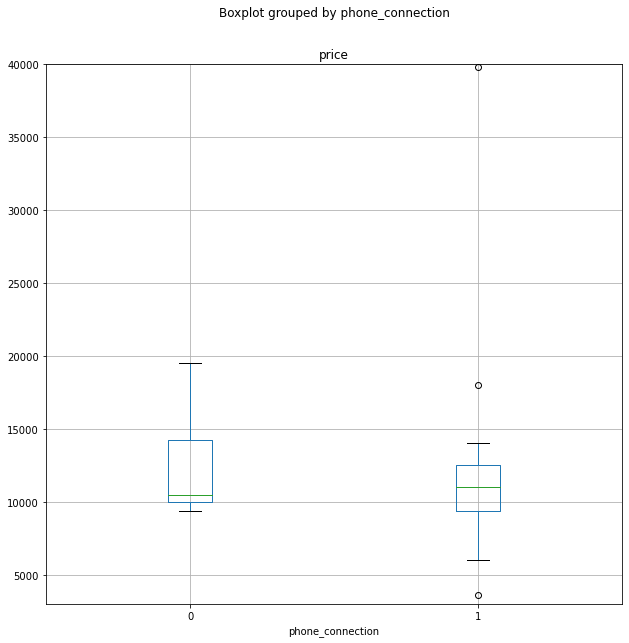

In [32]:
data.boxplot('price', by='phone_connection',figsize=(10,10)).set_ylim(3000,40000);

<font size="4">На этом графике мы можем видеть 2 боксплота(0 - распределение цен устройств с подключением к телефону, 1 - распределение цен устройств без подключения к телефону, т.е. с отдельным пультом). *Зеленая линия показывает медиану распределения этих данных*, по этому параметру мы и будем сравнивать медианную цену двух типов устройств. Можем предположить, что медианная цена устройств с подключением телефона и устройств без подключения примерно равна. В дальнейшем проверим нашу гипотезу статистическим методом.</font>

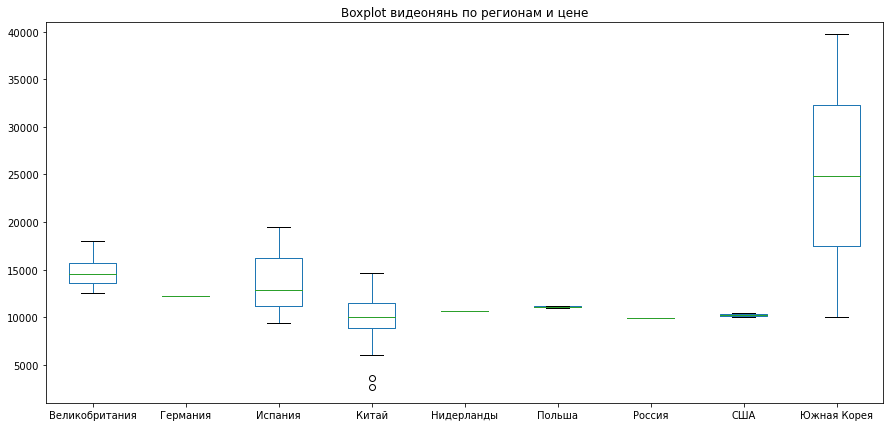

In [33]:
data.pivot_table(index = 'name', columns = 'region', values = 'price', aggfunc = 'sum').plot(kind='box',
                                                                                             ylim=(1000,41000),
                                                                                             figsize=(15,7),
                                                                                             title="Boxplot видеонянь по регионам и цене");


<font size="4">На этих боксплотах мы можем видеть, что **по медианному значению видеоняни, сделанные в Китае дешевле остальных.** На графике сильно выделяются видеоняни, сделанные в Южной Корее, но на самом деле из-за недостатка данных у нас получился такой результат. **Мы не можем утверждать, что в Южной Корее самые дорогие видеоняни.**</font>

In [34]:
#data[['name','price', 'child_size_width', 'child_size_length', 'phone_connection']].query('phone_connection == 0').sort_values(by = ['child_size_width', 'child_size_length'])


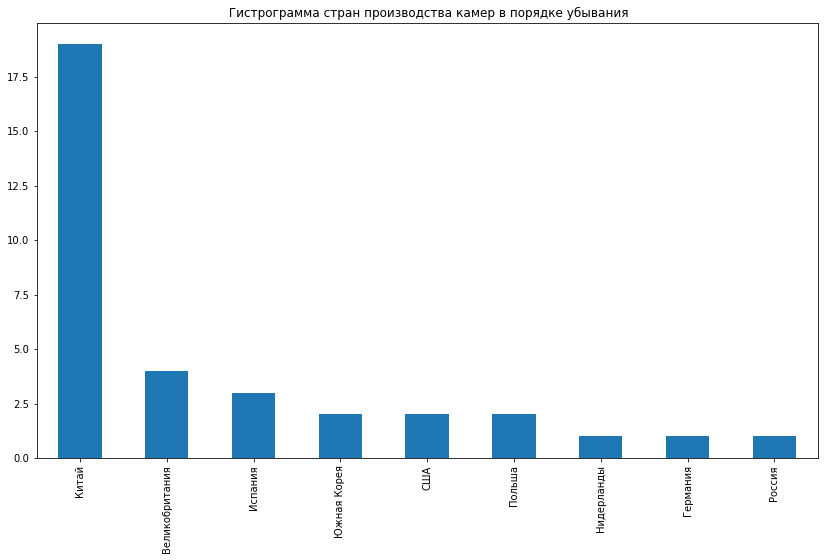

In [35]:
data['region'].unique()
hist_region = data['region'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title=" Гистрограмма стран производства камер в порядке убывания")
hist_region;

<font size="4">**Лемматизация — это процесс преобразования слова в его базовую форму.** Наша программа анализирует все отрицательные комментарии пользователей, которые нам удалось собрать, объединяет различные наклоненные формы слов и считает их количество. **По самым популярным формам слов мы предположим с какими самыми актуальными проблемами сталкивается пользовать при использовании видеонянь**</font>

In [36]:
lemma = pd.read_csv('comment.csv')
lemma['comments'] = lemma['comments'].str.lower()
lemma.head(40)

# импортируем нужные библиотеки для лемматизации
# создаём функцию лемматизации
from pymystem3 import Mystem
from collections import Counter
m = Mystem()
def lemat (table):
    m = Mystem()
    data_purpose = table
    row = ' '.join(data_purpose)
    lemmas = m.lemmatize(row)
    print(Counter(lemmas)) 

lemat(lemma['comments'])


Counter({' ': 1005, '.': 135, ', ': 95, 'не': 37, 'в': 24, 'камера': 22, 'и': 17, 'на': 17, 'с': 16, 'что': 14, 'но': 12, 'только': 12, 'приложение': 11, 'она': 11, 'быть': 11, 'нет': 11, 'через': 10, 'это': 10, 'от': 10, 'очень': 9, 'для': 9, 'работать': 9, 'а': 9, 'цена': 9, 'связь': 8, 'ребенок': 8, 'качество': 8, 'постоянно': 8, 'блок': 7, 'изображение': 7, 'при': 7, 'этот': 7, 'к': 7, 'телефон': 7, 'экран': 7, 'крепление': 6, 'сеть': 6, 'зарядка': 6, 'то': 6, 'колыбельный': 6, 'монитор': 6, 'я': 6, 'быстро': 5, 'самый': 5, 'если': 5, ' (': 5, 'сломаться': 5, 'за': 5, 'как': 5, 'у': 5, 'аккумулятор': 5, 'датчик': 4, 'картинка': 4, 'подключаться': 4, 'такой': 4, 'дешевый': 4, 'стена': 4, 'мы': 4, ' - ': 4, 'бы': 4, 'плохой': 4, 'часы': 4, 'невозможно': 4, 'карта': 4, 'провод': 4, 'розетка': 4, 'теряться': 4, 'освещение': 3, 'магнитный': 3, 'никак': 3, 'ловить': 3, 'использовать': 3, 'подставка': 3, 'сам': 3, 'терять': 3, ')': 3, 'чтобы': 3, 'так': 3, 'все': 3, 'о': 3, 'видео': 3, '5

<font size="4">*Мы получили все подсчитанные формы слов, но предствалены они не в очень понятном виде, поэтому напишем цикл, который представит одним списком самые популярные формы слов*</font>

In [37]:
def lemmas(problem):
    lemmas_list = ' '.join(m.lemmatize(problem))
    if 'прилож' in lemmas_list:
        return 'приложение'
    if ('качеств' or 'дешев') in lemmas_list:
        return 'качество'
    if ('изображ' or 'монит') in lemmas_list:
        return 'изображение'
    if ('заряд' or 'аккум') in lemmas_list:
        return 'зарядка'
    if ('датч' or 'связ') in lemmas_list:
        return 'датчик'

    #return lemmas_list

lemma['lemmas'] = lemma['comments'].apply(lemmas)
# С помощью Counter подсчитаем уникcaальные значения целей кредита
# Добавим эти категории в столбец lemmas_purpose
Counter(lemma['lemmas'])
lemma['lemmas'].sort_values(ascending = False)

11     приложение
2      приложение
0      приложение
7        качество
1        качество
4     изображение
5         зарядка
3         зарядка
6            None
8            None
9            None
10           None
Name: lemmas, dtype: object

<font size="4"> Список самых популярных форм слов выглядит очень странно. Я так и не смог пофиксить эту проблему, но в целом можно понять с какими проблемами встречаются пользователи:</font>
    
        1. Возможные проблемы пользователей с приложением:
        Большинство видеонянь сделаны в Китае, поэтому приложения могут быть только на китайском языке.
        Не всегда оптимизируют работу приложений для камер, которые выпустились давно.
        Иногда приложения приходится скачивать из сторонних источников, с этим у пользователей могут возникнуть проблемы.
    
        2. Возможные проблемы пользователей с качеством:
        Большинство камер производятся в Китае, а как мы все знаем, Китай любит удешевлять свои товары,
        используя некачественные материалы.
        
        3. Возможные проблемы пользователей с изображением:
        Бывает и такое, что разрешение камеры заявлено одно, а на самом деле оно гораздо хуже.
        В связи с этим пользователи могут жаловаться на изображение.
        
        4. Возможные проблемы пользователей с зарядкой:
        Гнезда видеонянь бывают некачественные и быстро расшатываются, также может попасться брак.
        Поэтому пользователю жалуются на проблемы с зарядкой      
       
    

In [38]:
data_1 = data.query('phone_connection == 1')
data_0 = data.query('phone_connection == 0')
data_1['sum_parent_length_width'] = data_1[data_1['parent_size_width']> 0]['parent_size_width'] + data_1[data_1['parent_size_length']> 0]['parent_size_length']
data_1['sum_child_length_width'] = data_1[data_1['child_size_width']> 0]['child_size_width'] + data_1['child_size_length']
data_0['sum_child_length_width'] = data_0[data_0['child_size_width']> 0]['child_size_width'] + data_0['child_size_length']

In [39]:
data_1_cor = data_1[['user_rating', 'price', 'sum_parent_length_width', 'weight']].query('user_rating > 0 & price > 0 & sum_parent_length_width > 0')
data_1_cor.corr()

,user_rating,price,sum_parent_length_width,weight
user_rating,1.000000,-0.310318,0.064429,-0.585937
price,-0.310318,1.000000,0.095442,0.465854
sum_parent_length_width,0.064429,0.095442,1.000000,-0.037598
weight,-0.585937,0.465854,-0.037598,1.000000


<font size="4"> **Вывод по таблице корреляции:**</font>
* Зависимость user_rating (sum_parent_length_width) ~ 0.06 (корреляции нет)
* Зависимость user_rating (price) ~ -0.31 (что говорит о том, что есть обратная слабая зависимость)
* Зависимость sum_parent_length_width (price) ~ 0.1 (очень слабая статистическая зависимость)
* Зависимость weight (price) ~ 0.47 (слабая статистическая зависимость, но близка к средней)

<font size="4">**Итог:**</font>
1. Размер не зависит от цены
2. Рейтинг слабо зависит от цены, чем выше цена, тем ниже рейтинг 
3. Вес слабо зависит от цены, но близок к средней зависимости(Можно предположить, что чем выше цена, тем материалы устройства качественней => легче)

# Выбрать для заказчика устройство с главным критерием 'миниатюрность' <a name="stage_4"></a>

In [40]:
#data[['name','price', 'parent_size_width', 'parent_size_length', 'child_size_width', 'child_size_length', 'phone_connection']].query('phone_connection == 1').sort_values(by = ['parent_size_width', 'parent_size_length', 'child_size_width', 'child_size_length'])

  <font size="6">Анализ устройств с подключением к телефону</font>(data_0)

In [41]:
data_0[['name','price', 'sum_child_length_width']].sort_values(by = ['sum_child_length_width', 'price'])

,name,price,sum_child_length_width
29,iBaby Monitor M2,10490,152.0
23,Wi-Fi Wisenet SmartCam SNH-V6410PN,9990,169.0
33,Miniland Digimonitor 3.5 plus,19500,175.0
20,Alcatel IPC-21FX,14650,186.0
5,Miniland everywhere IPcam,9380,196.0
28,Samsung SmartCam SNH-C6417BN,10390,220.0
9,Miniland Spin IP Camera,12880,230.0
12,Ramili Baby RV1300,14990,250.0
27,iBaby Monitor M6,9990,268.0
24,Link-NC21G-8GS,10000,270.0


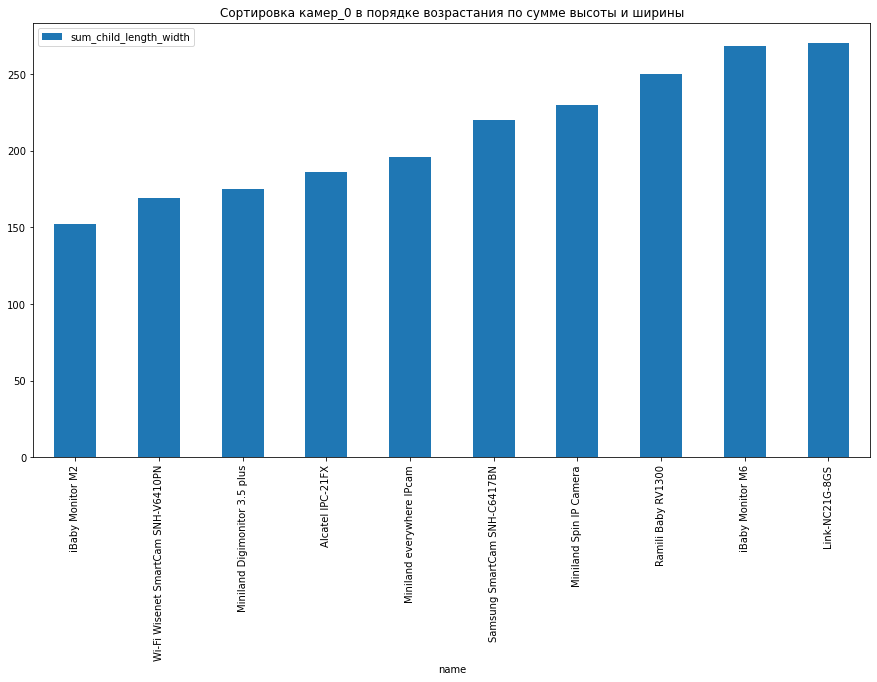

In [42]:
data_0[data_0['sum_child_length_width'] > 0].pivot_table(index = 'name', values = 'sum_child_length_width', aggfunc = 'sum').sort_values(ascending=True, by = 'sum_child_length_width').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер_0 в порядке возрастания по сумме высоты и ширины");

In [43]:
data_0_win_sum = data_0.query('sum_child_length_width < 220')

<font size="4"> Делаем срез видеонянь **меньше 220 по параметру 'sum_child_length_width'**

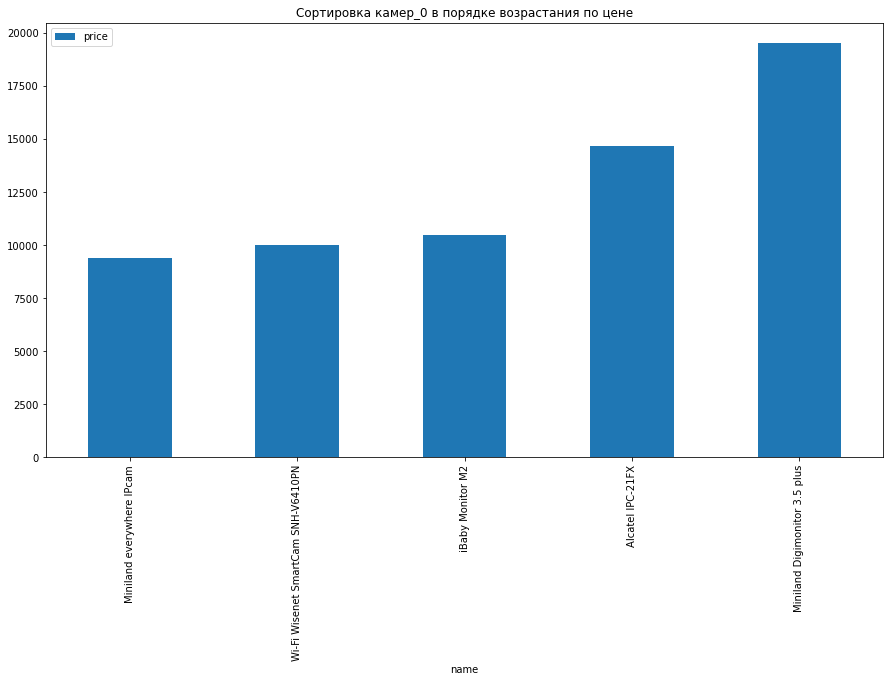

In [44]:
data_0_win_sum[data_0_win_sum['sum_child_length_width'] > 0].pivot_table(index = 'name', values = 'price', aggfunc = 'sum').sort_values(ascending=True, by = 'price').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер_0 в порядке возрастания по цене");

In [45]:
data_0_win_price = data_0_win_sum.query('price < 16000')

<font size="4"> Делаем срез видеонянь_0 **меньше 16000 по параметру 'price'**

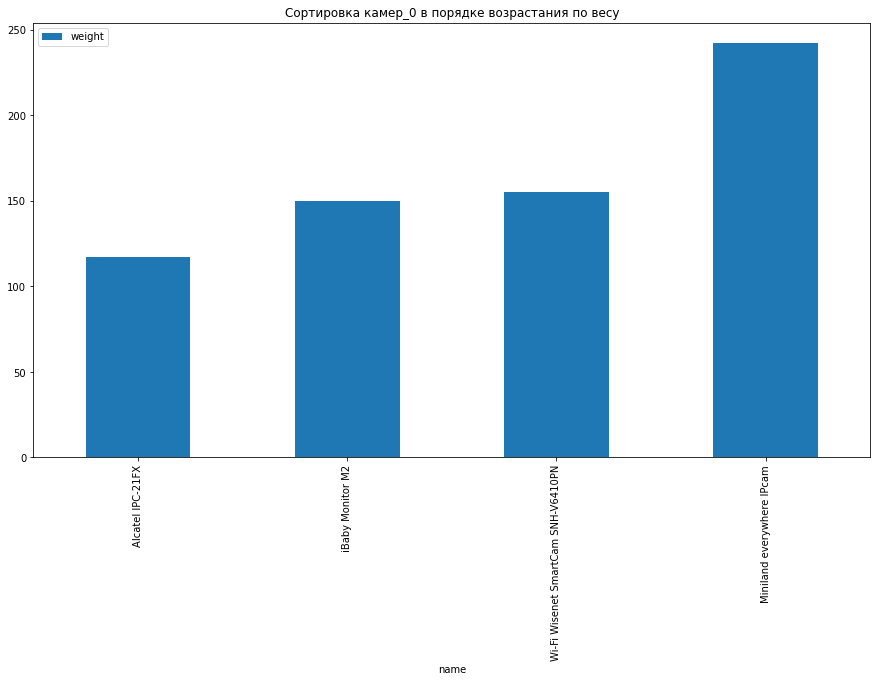

In [46]:
data_0_win_price[data_0_win_price['sum_child_length_width'] > 0].pivot_table(index = 'name', values = 'weight', aggfunc = 'sum').sort_values(ascending=True, by = 'weight').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер_0 в порядке возрастания по весу", fontsize=10);

In [47]:
data_0_win_weight = data_0_win_price.query('weight < 200')
#data_0_win_weight
#data_0_win_weight[data_0_win_weight['battery_life'] > 0]

<font size="4"> Делаем срез видеонянь_0 **меньше 200 по параметру 'weight'**</font>

In [48]:
data_0_win_weight

,name,price,user_rating,region,range_inside,range_outside,phone_connection,resolution,count_connection_type,connection_type,display,battery_life,child_size_width,child_size_length,parent_size_width,parent_size_length,weight,resolution_count,sum_child_length_width
20,Alcatel IPC-21FX,14650,4.0,Китай,-1.0,-1.0,0,1280x720,4.0,Wi-Fi,NaN,50,56.0,130.0,-1.0,-1.0,117.0,7.0,186.0
23,Wi-Fi Wisenet SmartCam SNH-V6410PN,9990,4.5,Южная Корея,100.0,200.0,0,1920x1080,NaN,Wi-Fi,NaN,-1,84.0,85.0,-1.0,-1.0,155.0,9.0,169.0
29,iBaby Monitor M2,10490,4.0,США,50.0,200.0,0,640x480,40.0,Wi-Fi,NaN,3,76.0,76.0,-1.0,-1.0,150.0,6.0,152.0


<font size="4"> Вывод: однозначные победители среди **аккумуляторных** видеонянь_0(только с подключением к телефону) по критериям - **размер, цена, вес**</font>

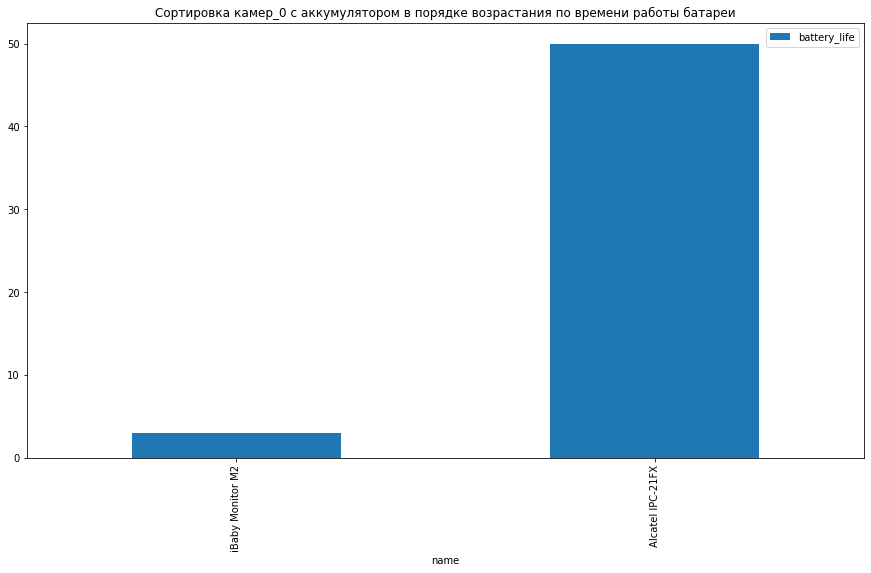

In [49]:
data_0_win_weight[data_0_win_weight['battery_life'] > 0].pivot_table(index = 'name', values = 'battery_life', aggfunc = 'sum').sort_values(ascending=True, by = 'battery_life').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер_0 с аккумулятором в порядке возрастания по времени работы батареи");

In [50]:
data_0_win_weight['battery_life'] = data_0_win_weight['battery_life'].astype('float64')
data_0_win_battery_life = data_0_win_weight.query('battery_life > 5')

<font size="4"> Делаем срез видеонянь_0 **больше 5 по параметру 'battery_life'**</font>

In [51]:
data_0_win_battery_life

,name,price,user_rating,region,range_inside,range_outside,phone_connection,resolution,count_connection_type,connection_type,display,battery_life,child_size_width,child_size_length,parent_size_width,parent_size_length,weight,resolution_count,sum_child_length_width
20,Alcatel IPC-21FX,14650,4.0,Китай,-1.0,-1.0,0,1280x720,4.0,Wi-Fi,NaN,50.0,56.0,130.0,-1.0,-1.0,117.0,7.0,186.0


<font size="4"> Вывод: однозначный победитель среди **аккумуляторных** видеонянь_0 по критериям - **размер, цена, вес, автономность**</font>

In [52]:
data_0_win_weight[data_0_win_weight['battery_life'] == -1]

,name,price,user_rating,region,range_inside,range_outside,phone_connection,resolution,count_connection_type,connection_type,display,battery_life,child_size_width,child_size_length,parent_size_width,parent_size_length,weight,resolution_count,sum_child_length_width
23,Wi-Fi Wisenet SmartCam SNH-V6410PN,9990,4.5,Южная Корея,100.0,200.0,0,1920x1080,NaN,Wi-Fi,NaN,-1.0,84.0,85.0,-1.0,-1.0,155.0,9.0,169.0


<font size="4">Вывод: однозначный победитель среди видеонянь_0 **от сети или на батарейках** по критериям - **размер, цена, вес, автономность**</font>

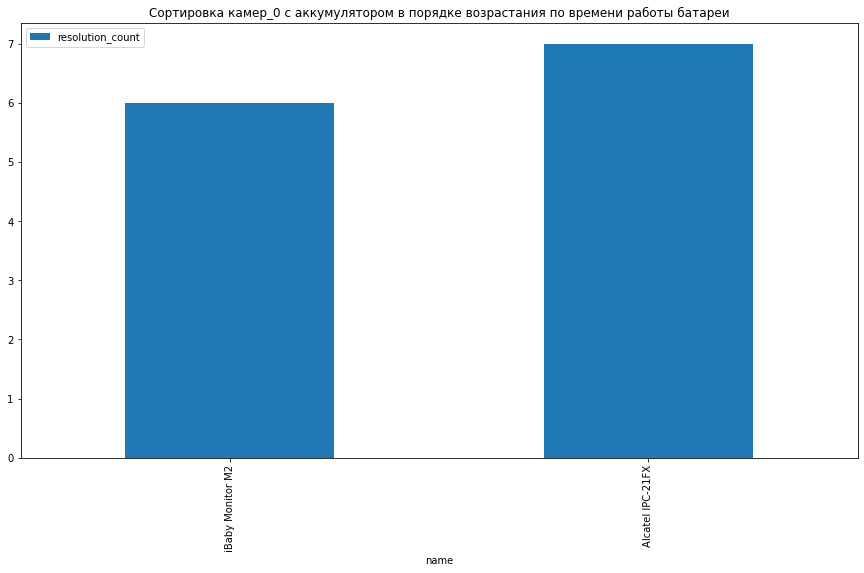

In [53]:
data_0_win_weight[data_0_win_weight['battery_life'] > 0].pivot_table(index = 'name', values = 'resolution_count', aggfunc = 'sum').sort_values(ascending=True, by = 'resolution_count').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер_0 с аккумулятором в порядке возрастания по времени работы батареи");

In [54]:
data_0_win_resolution = data_0_win_weight[data_0_win_weight['battery_life'] > 0]
data_0_win_resolution[data_0_win_resolution['resolution_count'] > 6]

,name,price,user_rating,region,range_inside,range_outside,phone_connection,resolution,count_connection_type,connection_type,display,battery_life,child_size_width,child_size_length,parent_size_width,parent_size_length,weight,resolution_count,sum_child_length_width
20,Alcatel IPC-21FX,14650,4.0,Китай,-1.0,-1.0,0,1280x720,4.0,Wi-Fi,NaN,50.0,56.0,130.0,-1.0,-1.0,117.0,7.0,186.0


<font size="4"> Вывод: однозначный победитель среди видеонянь_0 на **аккумуляторах** по критериям - **размер, цена, вес, разрешение.**</font>

In [55]:
data_0_win_resolution_AAA = data_0_win_weight[data_0_win_weight['battery_life'] == -1]
data_0_win_resolution_AAA

,name,price,user_rating,region,range_inside,range_outside,phone_connection,resolution,count_connection_type,connection_type,display,battery_life,child_size_width,child_size_length,parent_size_width,parent_size_length,weight,resolution_count,sum_child_length_width
23,Wi-Fi Wisenet SmartCam SNH-V6410PN,9990,4.5,Южная Корея,100.0,200.0,0,1920x1080,NaN,Wi-Fi,NaN,-1.0,84.0,85.0,-1.0,-1.0,155.0,9.0,169.0


<font size="4"> Вывод: однозначный победитель среди видеонянь_0 **на батарейках или от сети** по критерию - **размер, цена, вес, разрешение.**</font>


  <font size="6">Анализ устройств без подключения к телефону</font>(data_1)

In [56]:
data_1[['name','price', 'sum_parent_length_width']].sort_values(by = ['sum_parent_length_width', 'price'])

,name,price,sum_parent_length_width
37,SITITEK BM02,2650,100.0
31,Lionelo Видеоняня Babyline 5.1,10990,160.0
35,AngelEye AE210,5980,172.0
8,Summer Infant Slim&Secure 2.5,9799,172.0
21,Байкал М-01,9900,186.0
14,Alecto DVM-150,12200,187.0
0,Luvion Platinum 3,8450,190.0
36,Video Baby Monitor VB601,3620,191.0
19,Ramili Baby RV600,13990,195.0
17,Luvion Essential Plus,13500,200.0


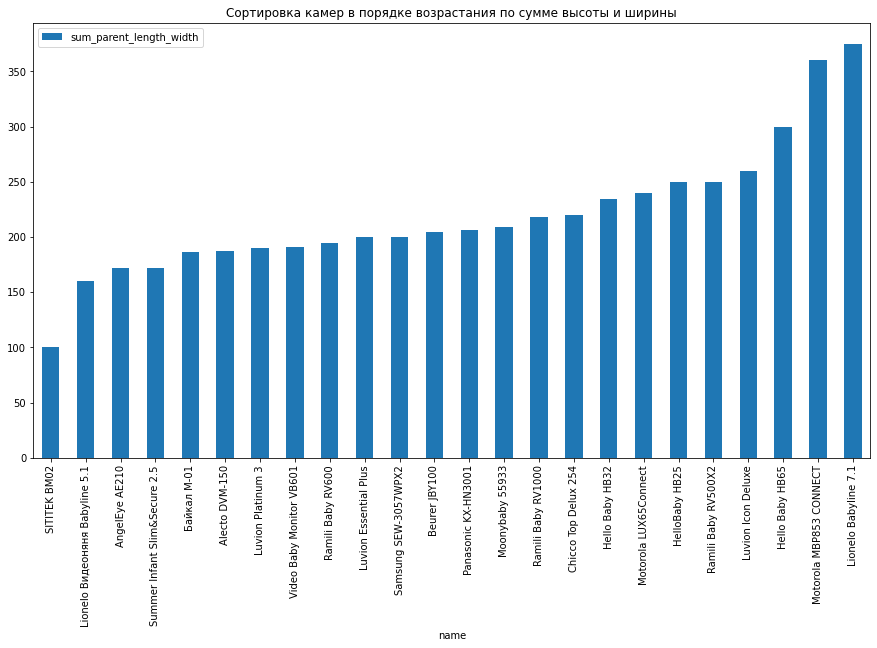

In [57]:
data_1[data_1['sum_parent_length_width'] > 0].pivot_table(index = 'name', values = 'sum_parent_length_width', aggfunc = 'sum').sort_values(ascending=True, by = 'sum_parent_length_width').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер в порядке возрастания по сумме высоты и ширины");

In [58]:
data_1_win_sum = data_1.query('sum_parent_length_width < 220')

<font size="4"> Делаем срез видеонянь_1(видеоняни, которые имеют пульт управления, то есть без подключения к телефону) **меньше 220 по параметру 'sum_parent_length_width'**</font>

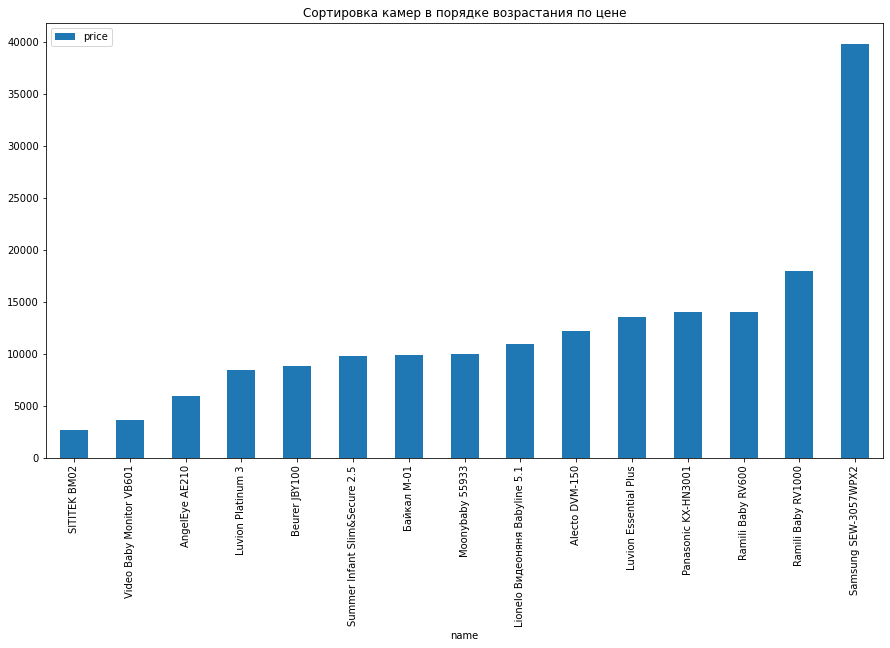

In [59]:
data_1_win_sum[data_1_win_sum['sum_parent_length_width'] > 0].pivot_table(index = 'name', values = 'price', aggfunc = 'sum').sort_values(ascending=True, by = 'price').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер в порядке возрастания по цене");

In [60]:
data_1_win_price = data_1_win_sum.query('price < 15000')

<font size="4"> Делаем срез видеонянь_1 **меньше 15000 по параметру 'price'**</font>

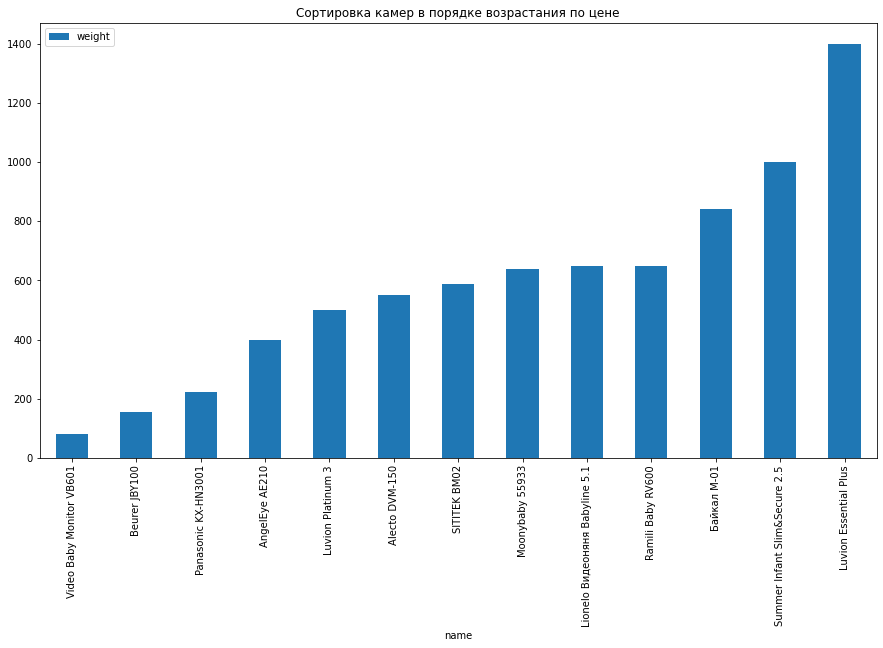

In [61]:
data_1_win_price[data_1_win_price['sum_parent_length_width'] > 0].pivot_table(index = 'name', values = 'weight', aggfunc = 'sum').sort_values(ascending=True, by = 'weight').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер в порядке возрастания по цене");

In [62]:
data_1_win_weight = data_1_win_price.query('weight < 700')
#data_1_win_weight[data_1_win_weight['battery_life'] == -1]

<font size="4"> Делаем срез видеонянь_1 **меньше 700 по параметру 'weight'**</font>

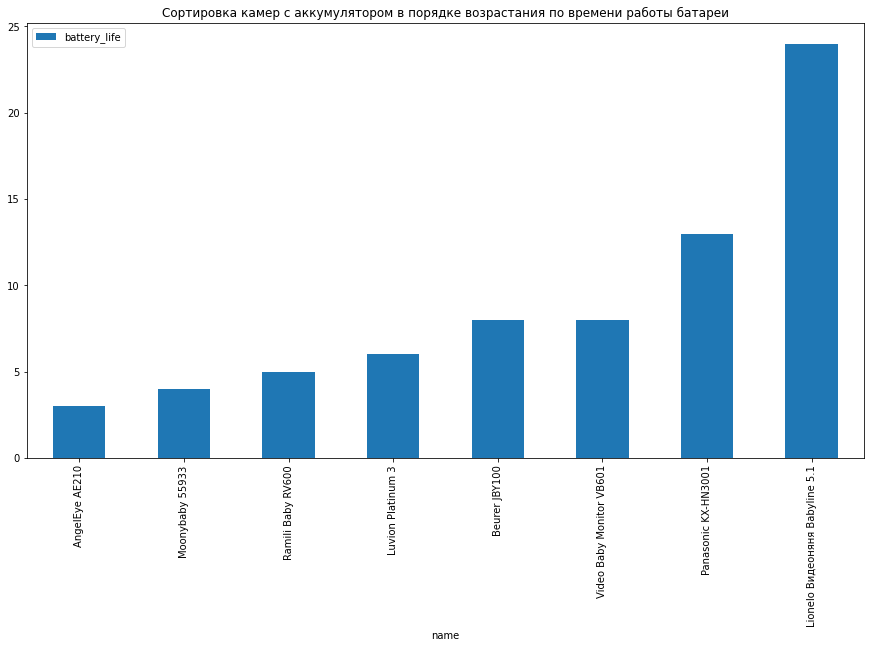

In [63]:
data_1_win_weight[data_1_win_weight['battery_life'] > 0].pivot_table(index = 'name', values = 'battery_life', aggfunc = 'sum').sort_values(ascending=True, by = 'battery_life').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер с аккумулятором в порядке возрастания по времени работы батареи");

In [64]:
data_1_win_weight['battery_life'] = data_1_win_weight['battery_life'].astype('float64')
data_1_win_final = data_1_win_weight.query('battery_life > 5')
data_1_win_final['name']


0                  Luvion Platinum 3
2                      Beurer JBY100
18               Panasonic KX-HN3001
31    Lionelo Видеоняня Babyline 5.1
36          Video Baby Monitor VB601
Name: name, dtype: object

<font size="4"> Делаем срез видеонянь_1 **больше 5 по параметру 'battery_life'****</font>
    
 <font size="4"> Вывод: однозначные победители среди **аккумуляторных** видеонянь_1 по критериям - **размер, цена, вес**</font>

In [65]:
#data_1_win_weight.info()
data_1_win_final.query('battery_life > 10')
data_1_win_final_battery_life = data_1_win_final.query('battery_life > 10')
data_1_win_final.query('battery_life > 10')

,name,price,user_rating,region,range_inside,range_outside,phone_connection,resolution,count_connection_type,connection_type,display,battery_life,child_size_width,child_size_length,parent_size_width,parent_size_length,weight,resolution_count,sum_parent_length_width,sum_child_length_width
18,Panasonic KX-HN3001,13990,4.9,Китай,200.0,300.0,1,320x240,NaN,DECT,3.5,13.0,123.0,77.0,125.0,81.0,224.0,4.0,206.0,200.0
31,Lionelo Видеоняня Babyline 5.1,10990,4.7,Польша,50.0,300.0,1,640x480,2.0,Wi-Fi,2.4,24.0,40.0,110.0,50.0,110.0,650.0,6.0,160.0,150.0


<font size="4"> Вывод: однозначные победители среди **аккумуляторных** видеонянь_1 по критериям - **размер, цена, вес, автономность**</font>

In [66]:
data_1_win_weight[data_1_win_weight['battery_life'] == -1]

,name,price,user_rating,region,range_inside,range_outside,phone_connection,resolution,count_connection_type,connection_type,display,battery_life,child_size_width,child_size_length,parent_size_width,parent_size_length,weight,resolution_count,sum_parent_length_width,sum_child_length_width
14,Alecto DVM-150,12200,4.5,Германия,50.0,300.0,1,480x272,1.0,"FHSS 2,4GHz",5.0,-1.0,95.0,166.0,85.0,102.0,550.0,5.0,187.0,261.0
37,SITITEK BM02,2650,4.0,Китай,50.0,150.0,1,320x240,4.0,"FHSS 2,4GHz",2.4,-1.0,90.0,150.0,50.0,50.0,588.0,4.0,100.0,240.0


<font size="4"> Вывод: однозначные победители среди видеонянь_1 **от сети или на батарейках** по критериям - **размер, цена, вес**</font>

In [67]:
data_1_win_weight_AAA=data_1_win_weight[data_1_win_weight['battery_life'] == -1]

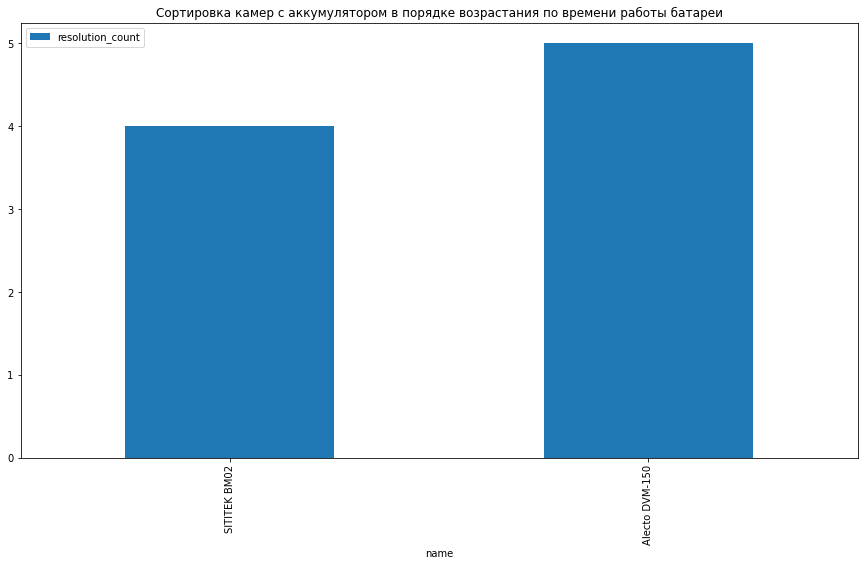

In [68]:
data_1_win_weight_AAA.pivot_table(index = 'name', values = 'resolution_count', aggfunc = 'sum').sort_values(ascending=True, by = 'resolution_count').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер с аккумулятором в порядке возрастания по времени работы батареи");

In [69]:
data_1_win_resolution_AAA = data_1_win_weight_AAA[data_1_win_weight_AAA['resolution_count'] > 4]
data_1_win_resolution_AAA[data_1_win_resolution_AAA['resolution_count'] > 4]

,name,price,user_rating,region,range_inside,range_outside,phone_connection,resolution,count_connection_type,connection_type,display,battery_life,child_size_width,child_size_length,parent_size_width,parent_size_length,weight,resolution_count,sum_parent_length_width,sum_child_length_width
14,Alecto DVM-150,12200,4.5,Германия,50.0,300.0,1,480x272,1.0,"FHSS 2,4GHz",5.0,-1.0,95.0,166.0,85.0,102.0,550.0,5.0,187.0,261.0


<font size="4"> Вывод: однозначный победитель видеонянь_1 **от сети** по критериям - **размер, цена, вес, разрешение**</font>

In [70]:
#data_1_win_final['resolution_count']

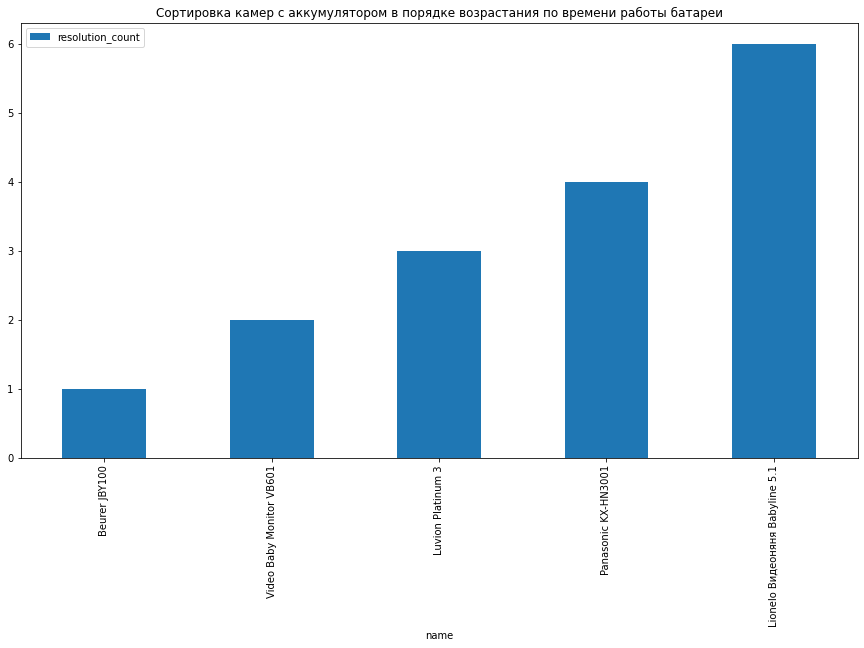

In [71]:
data_1_win_final[data_1_win_final['resolution_count'] > 0].pivot_table(index = 'name', values = 'resolution_count', aggfunc = 'sum').sort_values(ascending=True, by = 'resolution_count').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер с аккумулятором в порядке возрастания по времени работы батареи");

In [72]:
data_1_win_final[data_1_win_final['battery_life'] == -1]

,name,price,user_rating,region,range_inside,range_outside,phone_connection,resolution,count_connection_type,connection_type,display,battery_life,child_size_width,child_size_length,parent_size_width,parent_size_length,weight,resolution_count,sum_parent_length_width,sum_child_length_width


In [73]:
data_1_win_final_resolution = data_1_win_final[data_1_win_final['resolution_count'] > 3]
data_1_win_final[data_1_win_final['resolution_count'] > 3]

,name,price,user_rating,region,range_inside,range_outside,phone_connection,resolution,count_connection_type,connection_type,display,battery_life,child_size_width,child_size_length,parent_size_width,parent_size_length,weight,resolution_count,sum_parent_length_width,sum_child_length_width
18,Panasonic KX-HN3001,13990,4.9,Китай,200.0,300.0,1,320x240,NaN,DECT,3.5,13.0,123.0,77.0,125.0,81.0,224.0,4.0,206.0,200.0
31,Lionelo Видеоняня Babyline 5.1,10990,4.7,Польша,50.0,300.0,1,640x480,2.0,Wi-Fi,2.4,24.0,40.0,110.0,50.0,110.0,650.0,6.0,160.0,150.0


<font size="4"> Вывод: однозначные победители среди видеонянь_1 **от сети или на батарейках** по критериям - **размер, цена, вес, разрешение.** Совпало с автономностью.</font>

  <font size="6">Анализ видеокамер</font>(data_camera)

In [74]:
data_camera = pd.read_csv('cameras3.csv')
data_camera.head(20)

,name,price,user_rating,resolution,battery_life,weight,length,width
0,XYisfream,2040,4.7,1920x1080,3.00,32,40,40
1,Sailvde Surveillance,1079,4.7,1920x1080,1.00,25,45,45
2,HAMROLTE,852,4.7,1920x1080,NaN,41,58,58
3,YIKIXI,1828,4.5,1920x1080,NaN,21,30,30
4,Sailvde 4K Mini Surveillance,2379,4.7,3840x2160,5.00,50,48,80
5,JOZUZE DIY-30,1274,4.7,1280x720,NaN,9,17,54
6,CUGUU DIY Mini Camera,835,4.1,1920x1080,NaN,9,18,54
7,YIKIXI IR-CUT Mini Camera,1323,4.3,1920x1080,NaN,7,28,30
8,SECLINK USB Mini Camera,2980,4.7,1920x1080,NaN,24,26,158
9,Jinyan cam DIY Mini Micro DVR Black,1395,4.1,720x480,0.75,120,60,80


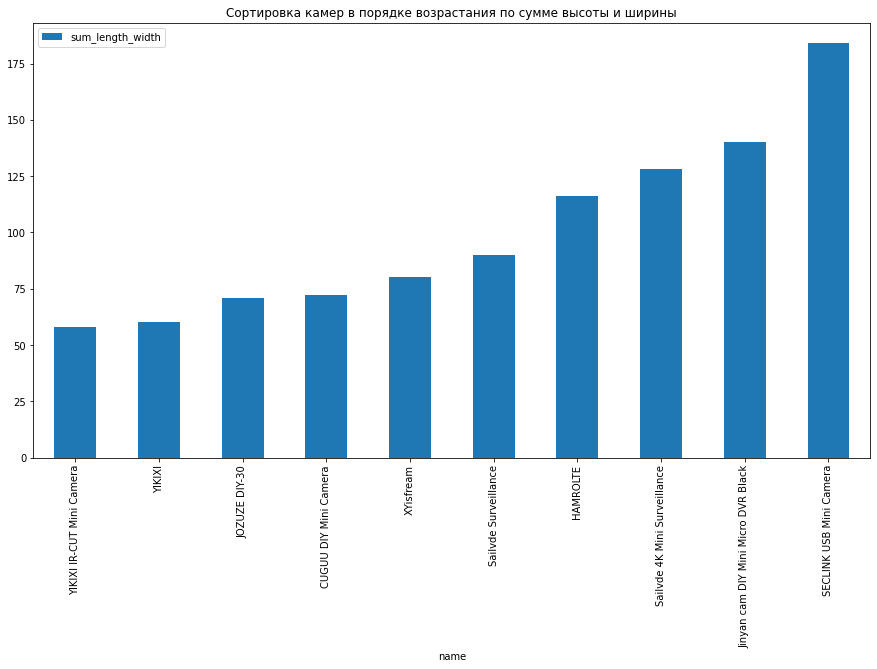

In [75]:
data_camera['sum_length_width'] = data_camera['length'] + data_camera['width']

data_camera.pivot_table(index = 'name', values = 'sum_length_width', aggfunc = 'sum').sort_values(ascending=True, by = 'sum_length_width').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер в порядке возрастания по сумме высоты и ширины");


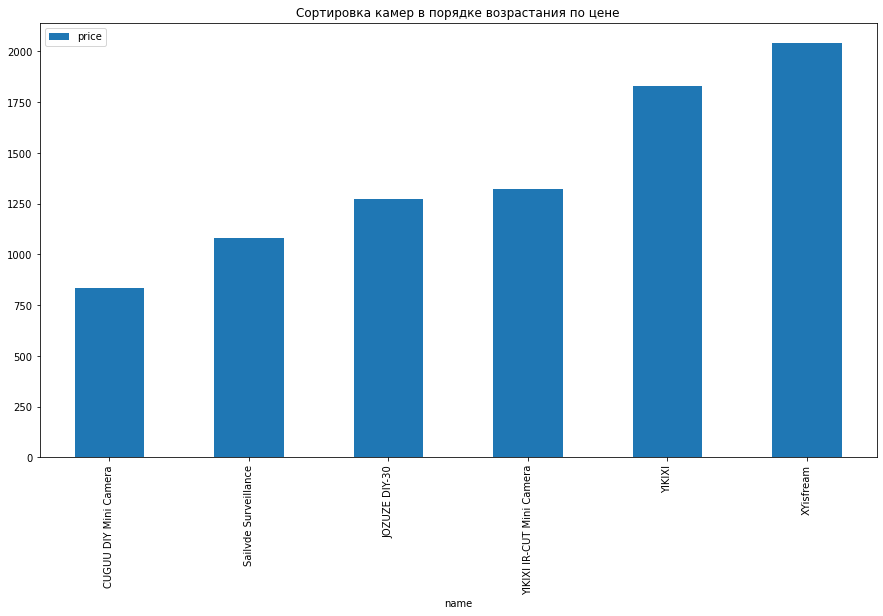

In [76]:
data_camera_win_sum = data_camera.query('sum_length_width < 100')

data_camera_win_sum.pivot_table(index = 'name', values = 'price', aggfunc = 'sum').sort_values(ascending=True, by = 'price').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер в порядке возрастания по цене");

In [77]:
data_camera = pd.read_csv('cameras3.csv')
data_camera.head(20)

,name,price,user_rating,resolution,battery_life,weight,length,width
0,XYisfream,2040,4.7,1920x1080,3.00,32,40,40
1,Sailvde Surveillance,1079,4.7,1920x1080,1.00,25,45,45
2,HAMROLTE,852,4.7,1920x1080,NaN,41,58,58
3,YIKIXI,1828,4.5,1920x1080,NaN,21,30,30
4,Sailvde 4K Mini Surveillance,2379,4.7,3840x2160,5.00,50,48,80
5,JOZUZE DIY-30,1274,4.7,1280x720,NaN,9,17,54
6,CUGUU DIY Mini Camera,835,4.1,1920x1080,NaN,9,18,54
7,YIKIXI IR-CUT Mini Camera,1323,4.3,1920x1080,NaN,7,28,30
8,SECLINK USB Mini Camera,2980,4.7,1920x1080,NaN,24,26,158
9,Jinyan cam DIY Mini Micro DVR Black,1395,4.1,720x480,0.75,120,60,80


In [78]:
data_camera['sum_length_width'] = data_camera['length'] + data_camera['width']

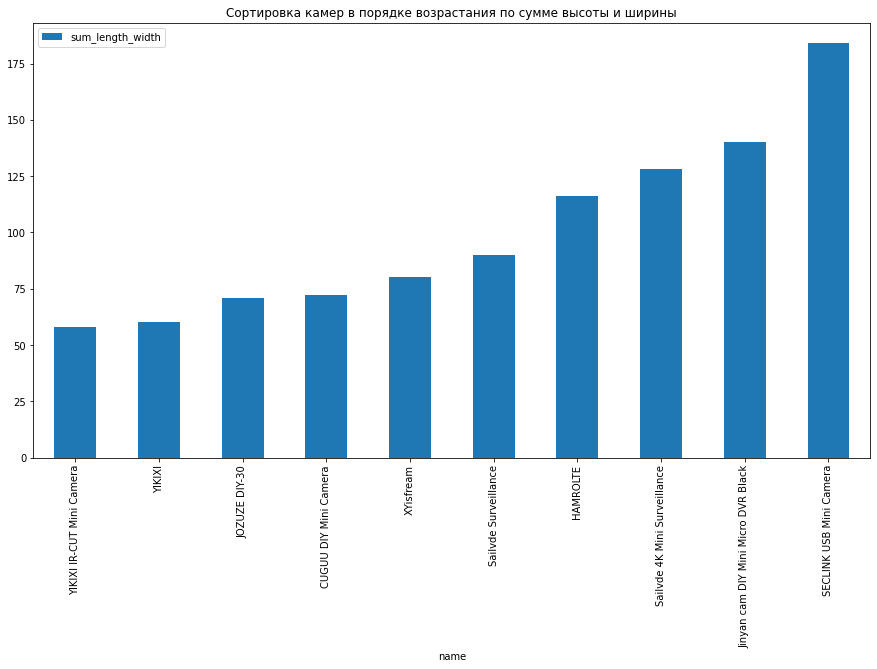

In [79]:
data_camera.pivot_table(index = 'name', values = 'sum_length_width', aggfunc = 'sum').sort_values(ascending=True, by = 'sum_length_width').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер в порядке возрастания по сумме высоты и ширины");

In [80]:
data_camera_win_sum = data_camera.query('sum_length_width < 100')

<font size="4"> Делаем срез видеокамер **меньше 100 по параметру 'sum_length_width'****</font>

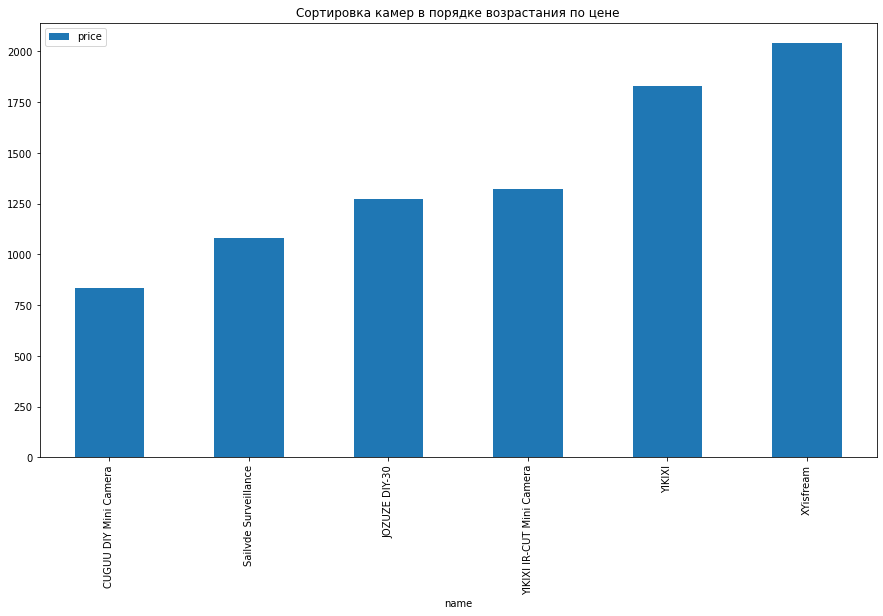

In [81]:
data_camera_win_sum.pivot_table(index = 'name', values = 'price', aggfunc = 'sum').sort_values(ascending=True, by = 'price').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер в порядке возрастания по цене");

In [82]:
data_camera_win_price = data_camera_win_sum.query('price < 1500')

<font size="4"> Делаем срез видеокамер **меньше 1500 по параметру 'price'****</font>

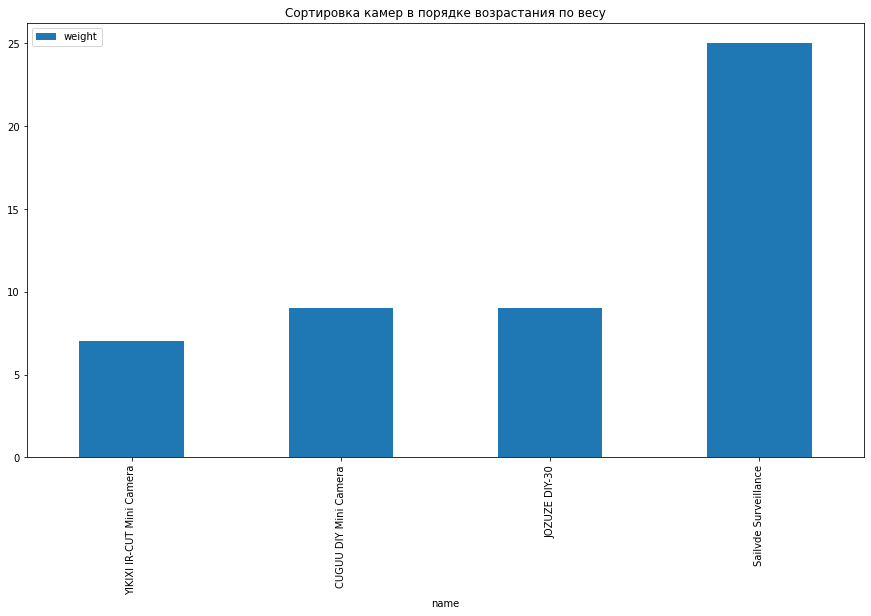

In [83]:
data_camera_win_price.pivot_table(index = 'name', values = 'weight', aggfunc = 'sum').sort_values(ascending=True, by = 'weight').plot(kind = 'bar', figsize=(15,8),title="Сортировка камер в порядке возрастания по весу", fontsize=10);

In [84]:
data_camera_win_weight = data_camera_win_price.query('weight < 15')
data_camera_win_weight

,name,price,user_rating,resolution,battery_life,weight,length,width,sum_length_width
5,JOZUZE DIY-30,1274,4.7,1280x720,NaN,9,17,54,71
6,CUGUU DIY Mini Camera,835,4.1,1920x1080,NaN,9,18,54,72
7,YIKIXI IR-CUT Mini Camera,1323,4.3,1920x1080,NaN,7,28,30,58


<font size="4"> Делаем срез видеокамер **меньше 15 по параметру 'weight'****</font>

<font size="4"> Вывод: лучшие видеокамеры по критерию **миниатюрность**</font>

# Проверка гипотез
<a name="stage_5"></a>
 [обратно в оглавление](#contents)

<font size="4">**1 гипотеза:** средняя цена за устройство без подключения к телефону **не отличается** от устройства с подключением к телефону
    
    
<font size="4">**2 гипотеза:** средний размер видеонянь с подключением к телефону **не отличается** от видеокамер

<font size="4">**H0**(нулевая гипотеза):средняя цена за устройство без подключения к телефону **не отличается** от устройства с подключением к телефону</font>

<font size="4">**H1**(альтернативная гипотеза):средняя цена за устройство без подключения к телефону **отличается** от устройства с подключением к телефону</font>

In [85]:
phone_0_price = data[data['phone_connection']==0]['price']
phone_1_price = data[data['phone_connection']==1]['price']
#phone_0_median_value = phone_0_median.sum()
#phone_1_median_value = phone_1_median.sum()
#проверяем первую гипотезу

alpha = .05

results = st.ttest_ind(phone_0_price, phone_1_price, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.7279300475376385
Не получилось отвергнуть нулевую гипотезу


<font size="4">Нам не удалось отвергнуть нулевую гипотезу. Это означает, что **1 гипотеза верна**. Действительно, до этого мы выяснили, что медианные значения цен примерно похожи.</font>

<font size="4">**H0**:средний размер видеонянь с подключением к телефону **не отличается** от видеокамер</font>

<font size="4">**H1**:средний размер видеонянь с подключением к телефону **отличается** от видеокамер</font>

In [86]:
data_0_sum_child_length_width = data_0['sum_child_length_width']
data_camera_sum_length_width = data_camera['sum_length_width']
#phone_0_median_value = phone_0_median.sum()
#phone_1_median_value = phone_1_median.sum()
#проверяем первую гипотезу

alpha = .05

results = st.ttest_ind(data_0_sum_child_length_width, data_camera_sum_length_width, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1472552548126475e-05
Отвергаем нулевую гипотезу


<font size="4">Отвергаем нулевую гипотезу. Это означает, что **2 гипотеза не верна**, поэтому мы применяем альтернативную гипотезу: **средний размер видеонянь с подключением к телефону отличается от видеокамер**. </font>

<a name="stage_6"></a>
# Общий вывод:
 [обратно в оглавление](#contents)

<font size="4">Мы провели исследовательский анализ рынка видеонянь: сделали репрезентативную выборку для анализа,сделали предобработку данных, выявили неоднозначные корреляции в данных, а также визуализировали наши данные. Используя библиотеку, разработанную Яндексом, мы проанализировали отрицательные отзывы пользователей и сформировали список самых популярных проблем потребителей.</font>

<font size="4">Также нашим заданием было определить лучшее устройство для заказчика по критерию 'Миниатюрность'. К этому критерию мы определили 2 технические характеристики: сумма высоты и ширины устройства, вес. Также мы не учитывали дорогие видеоняни относительно нашей выборке. Чтобы визуализировать наши выводы, мы построили дерево, по которому можно отобрать лучшие устройства по другим параметрам, уже соответствующие критерию миниатюрность. Тоже самое мы проделали для видеокамер.</font>

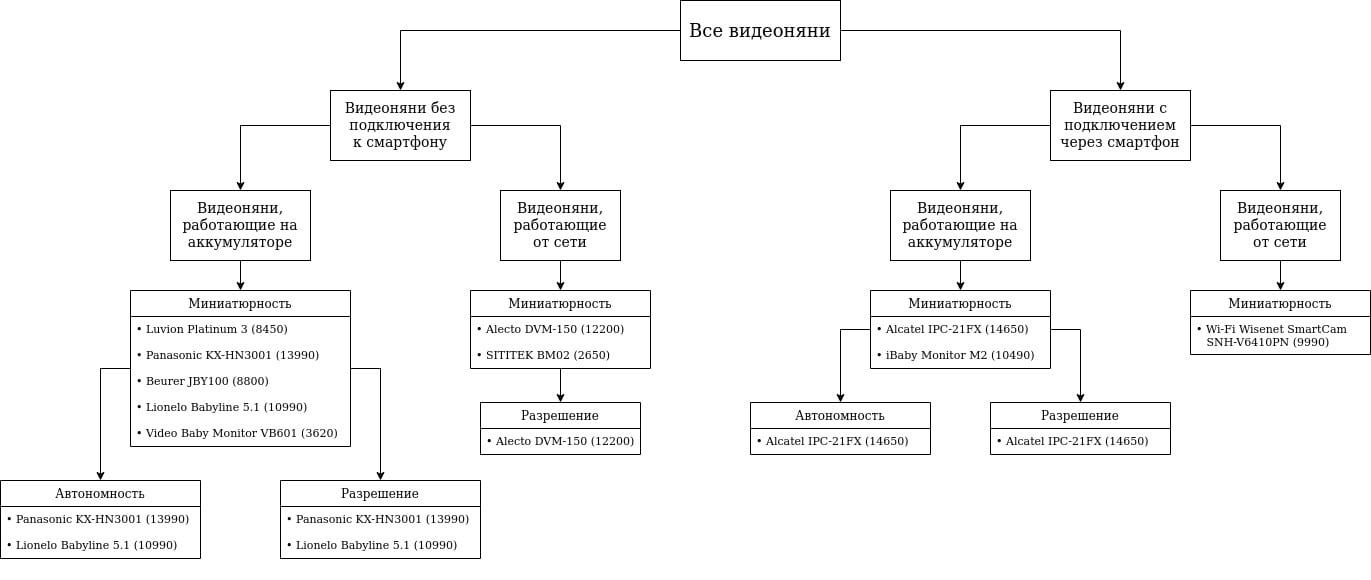

In [87]:
from IPython.display import Image
Image("all.jpg")

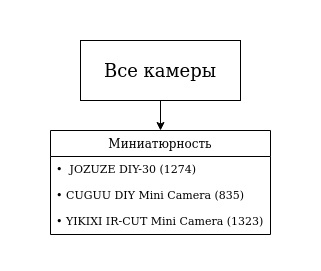

In [88]:
Image("all_video.jpg")